# Encontrando integral, derivadas y puntos críticos restantes de la regresión empleada
__Hans D. Escobar H.__

In [83]:
import sympy
sympy.init_printing()

> logistic:


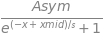

> integral:


> derivative_1:


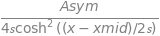

> derivative_2:


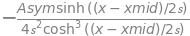

> derivative_3:


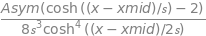

> derivative_4:


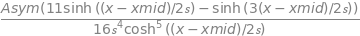

In [84]:
x = sympy.symbols("x", real = True)
Asym, xmid, scal = sympy.symbols("Asym, xmid, scal", positive = True)

my_functions = dict()
my_functions["logistic"] = Asym/(1+sympy.exp((xmid-x)/scal))
my_functions["integral"] = sympy.simplify(sympy.integrate(my_functions["logistic"],x))
my_functions["derivative_1"]= sympy.simplify(sympy.diff(my_functions["logistic"],x))
my_functions["derivative_2"]= sympy.simplify(sympy.diff(my_functions["derivative_1"],x))
my_functions["derivative_3"]= sympy.simplify(sympy.diff(my_functions["derivative_2"],x))
my_functions["derivative_4"]= sympy.simplify(sympy.diff(my_functions["derivative_3"],x))

sorted_names = [
    'logistic','integral',
    'derivative_1', 'derivative_2',
    'derivative_3', 'derivative_4']

for key in sorted_names:
    print("> " + key + ":")
    display(my_functions[key])

## Punto de inicio de la desaceleración asintótica

Es el mayor $x$ tal que $\frac{\mathrm{d}^4 f(x)}{\mathrm{d} x^4} = 0$

In [85]:
derivative_4_solutions = sympy.solve(my_functions["derivative_4"], x)
derivative_4_solutions = [sympy.simplify(v) for v in derivative_4_solutions]
print(f"{len(derivative_4_solutions)} solutions:")
for i in range(len(derivative_4_solutions)):
    display(derivative_4_solutions[i])

3 solutions:


Son 3 valores, solo se necesitan 3 comparaciones para ordenarlos:


In [86]:
for i,j in [(0,1), (0,2), (1, 2)]:
    print(f"\nIs x{i} <= x{j} ?")
    print(derivative_4_solutions[i] - derivative_4_solutions[j] <= 0)


Is x0 <= x1 ?
False

Is x0 <= x2 ?
True

Is x1 <= x2 ?
True


El orden, entonces es $x_1 < x_0 \leq x_2$. Por lo tanto, el punto de desaceleración asintótica está dado por:

In [87]:
derivative_4_solutions[2]

## Máximo de la primera derivada

Ya sabemos qué el máximo de $\frac{\mathrm{d} f(x)}{\mathrm{d} x}$ está en $x = x_{mid}$. El máximo se corresponde, entonces es:

In [88]:
my_functions["derivative_1"].subs(x,xmid)

## Bibliografía

Meurer A, Smith CP, Paprocki M, Čertík O, Kirpichev SB, Rocklin M, Kumar A,
Ivanov S, Moore JK, Singh S, Rathnayake T, Vig S, Granger BE, Muller RP,
Bonazzi F, Gupta H, Vats S, Johansson F, Pedregosa F, Curry MJ, Terrel AR,
Roučka Š, Saboo A, Fernando I, Kulal S, Cimrman R, Scopatz A. (2017) SymPy:
symbolic computing in Python. *PeerJ Computer Science* 3:e103
https://doi.org/10.7717/peerj-cs.103
